In [4]:
import pandas as pd
import ast
import re
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

# Load data
df = pd.read_csv(r"E:\ML proj\Data\msme_MAHARASHTRA.csv")

# Cleaning data
def get_activities(text):
    try:
        activities = ast.literal_eval(text)
        descs = [a.get('Description','') for a in activities]
        return " ".join(descs)
    except:
        return ""

df['ActivityText'] = df['Activities'].apply(get_activities)
df['EnterpriseName'] = df['EnterpriseName'].fillna("")
df['ActivityText'] = df['ActivityText'].fillna("")
df['AllText'] = df['EnterpriseName'] + " " + df['ActivityText']

# text cleaning
def clean_text(text):
    words = re.findall(r'\b[a-zA-Z]{3,}\b', text.lower())
    stop_words = set(['the', 'and', 'for', 'with', 'this', 'that', 'from', 'are', 'has', 'have'])
    good_words = [w for w in words if w not in stop_words]
    return " ".join(good_words)

df['CleanText'] = df['AllText'].apply(clean_text)


Making word cloud...


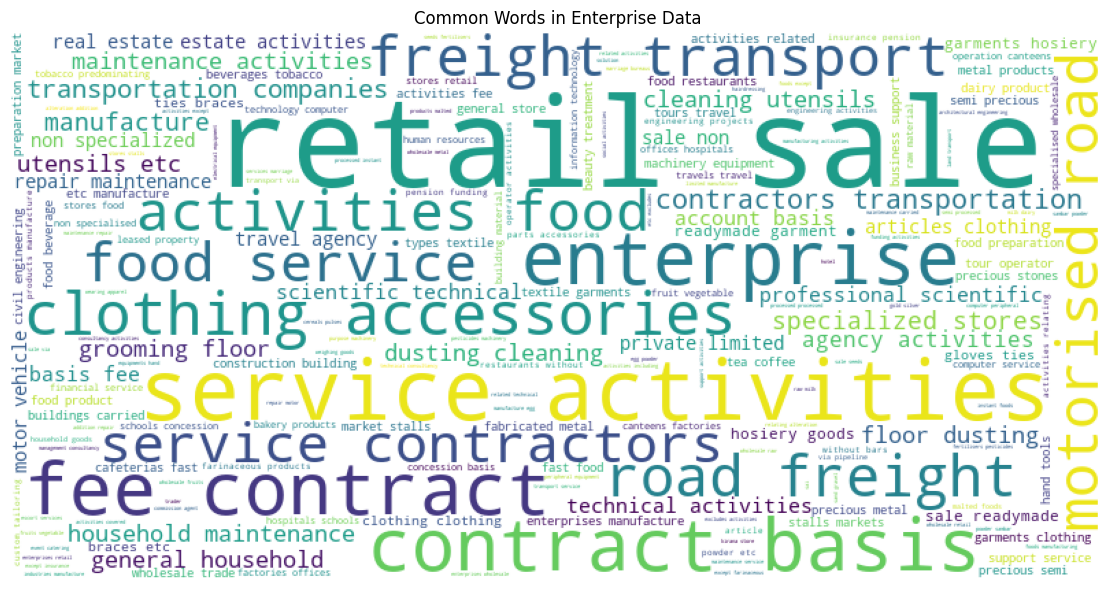

In [5]:

# Word Cloud
print("Making word cloud...")
all_text = " ".join(df['CleanText'].tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Common Words in Enterprise Data")
plt.tight_layout()
plt.show()

Making bar chart of top words...


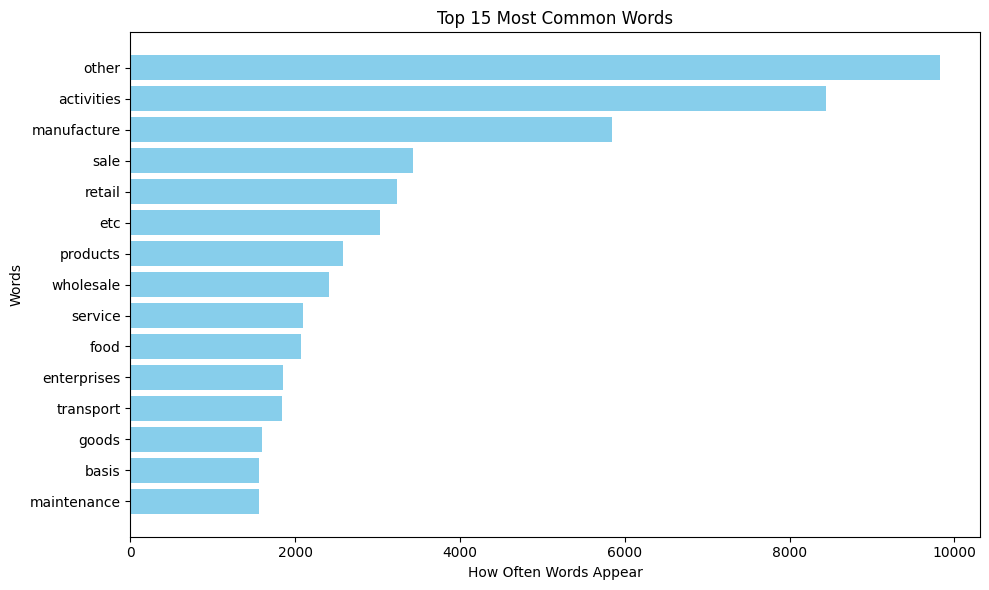

In [6]:
# Top Words Bar Chart
print("Making bar chart of top words...")
words = all_text.split()
word_counts = Counter(words)
top_15 = word_counts.most_common(15)

words, counts = zip(*top_15)

plt.figure(figsize=(10,6))
plt.barh(words, counts, color='skyblue')
plt.xlabel('How Often Words Appear')
plt.ylabel('Words')
plt.title('Top 15 Most Common Words')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Doing TF-IDF analysis...
Top 5 important words: ['activities', 'manufacture', 'other', 'retail', 'sale']


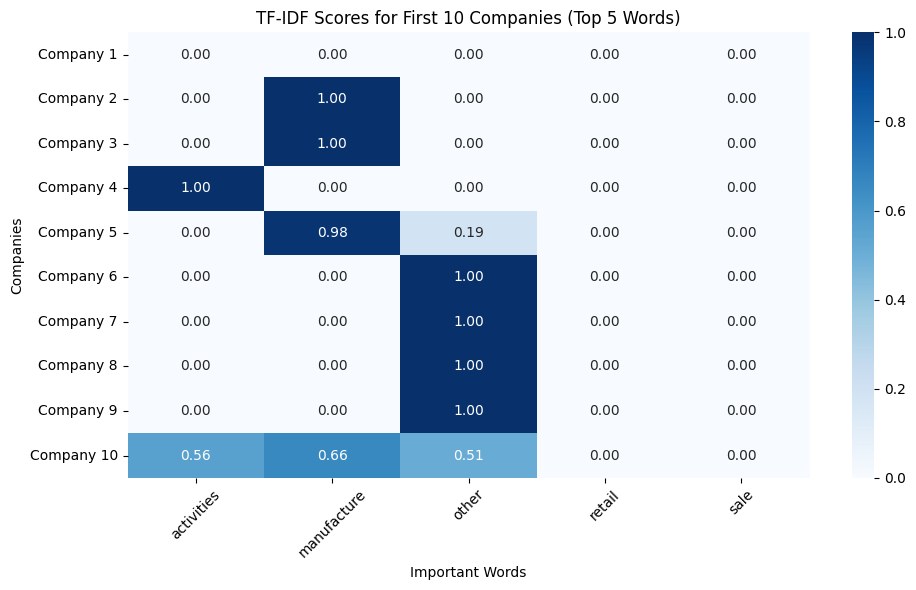

In [7]:
# TF-IDF Analysis
print("Doing TF-IDF analysis...")
vectorizer = TfidfVectorizer(max_features=5)
tfidf_matrix = vectorizer.fit_transform(df['CleanText'])
feature_names = vectorizer.get_feature_names_out()

print(f"Top 5 important words: {list(feature_names)}")

plt.figure(figsize=(10, 6))
tfidf_small = tfidf_matrix[:10].toarray()

sns.heatmap(tfidf_small, 
            xticklabels=feature_names,
            yticklabels=[f"Company {i+1}" for i in range(10)],
            cmap="Blues",
            annot=True,
            fmt='.2f')

plt.title("TF-IDF Scores for First 10 Companies (Top 5 Words)")
plt.xlabel("Important Words")
plt.ylabel("Companies")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [8]:
# 4. Similarity Analysis
print("Calculating similarities...")
cos_sim = cosine_similarity(tfidf_matrix)

# 5x5 Similarity Matrix
plt.figure(figsize=(8,6))
similarity_5x5 = cos_sim[:5, :5]
company_names = [name[:20] + '...' if len(name) > 20 else name 
                for name in df['EnterpriseName'].head(5)]

sns.heatmap(similarity_5x5, 
            xticklabels=company_names,
            yticklabels=company_names,
            annot=True, 
            cmap="YlOrRd",
            fmt='.3f',
            linewidths=0.5)
plt.title("Similarity Between First 5 Companies")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Calculating similarities...


MemoryError: Unable to allocate 2.80 GiB for an array with shape (19400, 19400) and data type float64

Making word categories pie chart...


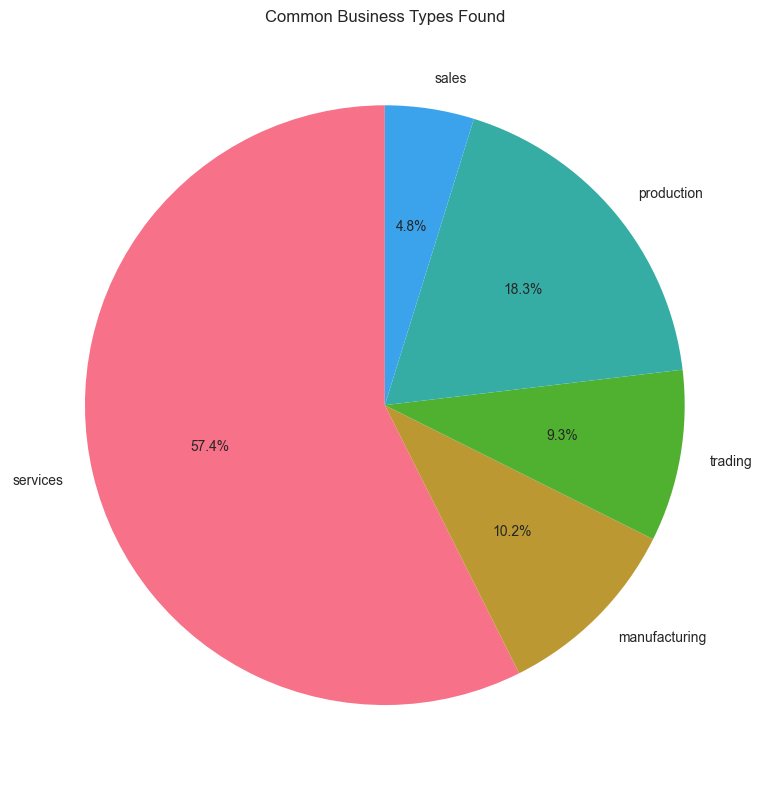

In [29]:
print("Making word categories pie chart...")
all_text = " ".join(df['CleanText'].tolist())
words = all_text.split()
word_counts = Counter(words)

common_business_words = ['manufacturing', 'trading', 'services', 'production', 'sales']
found_words = {word: count for word, count in word_counts.items() if word in common_business_words}

plt.figure(figsize=(8, 8))
plt.pie(found_words.values(), labels=found_words.keys(), autopct='%1.1f%%', startangle=90)
plt.title('Common Business Types Found')
plt.tight_layout()
plt.show()

In [ ]:

# 6. Simple Statistics
print("\n=== BASIC STATS ===")
print(f"Total companies: {len(df)}")
print(f"Different words: {len(set(all_text.split()))}")

avg_words = np.mean([len(text.split()) for text in df['CleanText']])
print(f"Avg words per company: {avg_words:.1f}")

print("\nTop 10 words:")
for word, count in word_counts.most_common(10):
    print(f"  {word}: {count} times")

print(f"\nSimilarity info:")
print(f"  Average: {cos_sim.mean():.3f}")
print(f"  Highest: {cos_sim.max():.3f}")
print(f"  Lowest: {cos_sim.min():.3f}")

print("\nDone! All graphs made successfully.")


=== BASIC STATS ===
Total companies: 19400
Different words: 14289
Avg words per company: 12.8

Top 10 words:
  other: 9819 times
  activities: 8439 times
  manufacture: 5846 times
  sale: 3435 times
  retail: 3231 times
  etc: 3028 times
  products: 2575 times
  wholesale: 2415 times
  service: 2091 times
  food: 2067 times

Similarity info:
  Average: 0.100
  Highest: 1.000
  Lowest: 0.000

Done! All graphs made successfully.
